In [4]:
#Project Glee - AngelHack Submission
#Predict the occurence of a flood using LSTM

%matplotlib inline

from __future__ import print_function

import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"

import numpy as np
import matplotlib.pyplot as plt
import pandas
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

plt.style.use('ggplot')

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
np.random.seed(10)

In [31]:
dataframe = pandas.read_csv('dataset/flood_train.csv', usecols=[1], engine='python', skipfooter=3)
dataset   = dataframe.values
dataset   = dataset.astype('float32')
dataframe.head()

,waterlevel
0,0.27
1,0.26
2,0.27
3,0.28
4,0.28


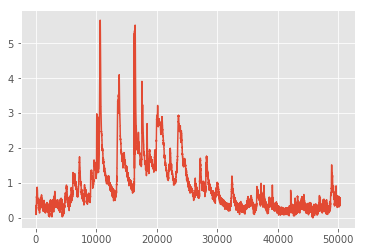

In [7]:
plt.plot(dataset)


In [8]:
# normalize the dataset
scaler  = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [9]:
# split into train and test sets
train_size  = int(len(dataset) * 0.67)
test_size   = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

33710 16604


----------------- TRAINING DATA -----------------


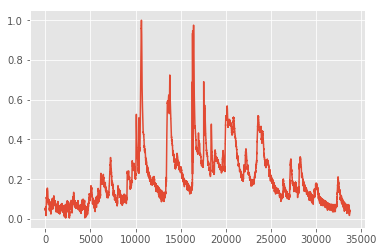

----------------- TEST DATA -----------------


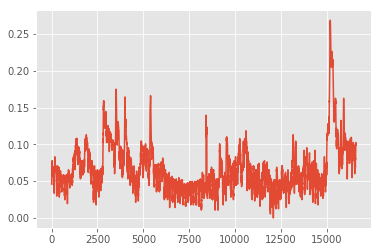

In [10]:
print('----------------- TRAINING DATA -----------------')
plt.plot(train)
plt.show()
print('----------------- TEST DATA -----------------')
plt.plot(test)
plt.show()

In [11]:
# This function creates a sliding window of the dataset.
def create_dataset(dataset, sliding_window=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-sliding_window-1):
        a = dataset[i:(i+sliding_window), 0]
        dataX.append(a)
        dataY.append(dataset[i + sliding_window, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
# use a n-10 sliding window equivalent to 2.5 hours of historical data
slide_window   = 10
trainX, trainY = create_dataset(train, slide_window)
testX, testY   = create_dataset(test, slide_window)

In [13]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX  = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [15]:
#Setup the LSTM

model = Sequential()
model.add(LSTM(4, input_dim=slide_window))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=50, batch_size=1, verbose=2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 10))`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Epoch 1/50
 - 62s - loss: 1.9681e-04
Epoch 2/50
 - 65s - loss: 1.2748e-04
Epoch 3/50
 - 58s - loss: 1.1672e-04
Epoch 4/50
 - 82s - loss: 1.0960e-04
Epoch 5/50
 - 80s - loss: 1.0737e-04
Epoch 6/50
 - 72s - loss: 1.0665e-04
Epoch 7/50
 - 73s - loss: 1.0470e-04
Epoch 8/50
 - 76s - loss: 1.0409e-04
Epoch 9/50
 - 84s - loss: 1.0056e-04
Epoch 10/50
 - 76s - loss: 1.0212e-04
Epoch 11/50
 - 72s - loss: 1.0031e-04
Epoch 12/50
 - 63s - loss: 1.0120e-04
Epoch 13/50
 - 62s - loss: 1.0224e-04
Epoch 14/50
 - 70s - loss: 9.8223e-05
Epoch 15/50
 - 74s - loss: 1.0057e-04
Epoch 16/50
 - 66s - loss: 9.9101e-05
Epoch 17/50
 - 79s - loss: 1.0203e-04
Epoch 18/50
 - 81s - loss: 1.0030e-04
Epoch 19/50
 - 64s - loss: 9.9889e-05
Epoch 20/50
 - 74s - loss: 1.0112e-04
Epoch 21/50
 - 70s - loss: 9.9237e-05
Epoch 22/50
 - 67s - loss: 1.0077e-04
Epoch 23/50
 - 72s - loss: 9.7421e-05
Epoch 24/50
 - 94s - loss: 1.0188e-04
Epoch 25/50
 - 78s - loss: 9.9797e-05
Epoch 26/50
 - 76s - loss: 1.0528e-04
Epoch 27/50
 - 86s - 

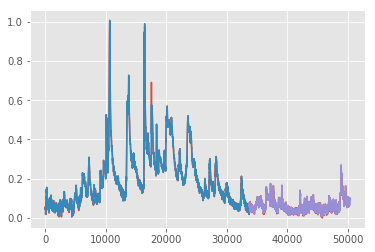

In [20]:
trainPredict = model.predict(trainX)
testPredict  = model.predict(testX)
 
# shift train predictions for plotting
trainPredictPlot       = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[slide_window:len(trainPredict)+slide_window, :] = trainPredict
 
# shift test predictions for plotting
testPredictPlot       = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(slide_window*2)+1:len(dataset)-1, :] = testPredict
 
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

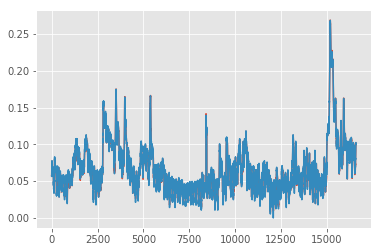

In [21]:
plt.plot(testPredict)
plt.plot(testY)

In [22]:
unseen = pandas.read_csv('dataset/flood_test.csv',sep=',')


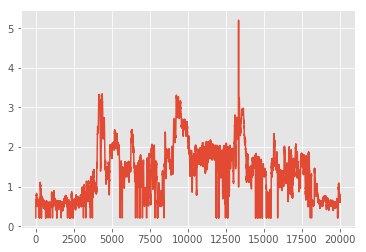

In [25]:
unseen_test = unseen['waterlevel'].values
plt.plot(unseen_test[0:20000])
unseen_clean = []
for i in unseen_test:
    unseen_clean.append([i])
unseen_clean = np.asarray(unseen_clean).astype('float32')
unseen_clean = scaler.fit_transform(unseen_clean)

In [26]:
features,labels = create_dataset(unseen_clean, slide_window)
features        = np.reshape(features, (109186,1, 10)) 

In [27]:
unseen_results = model.predict(features)


----------------- Predicted ---------------


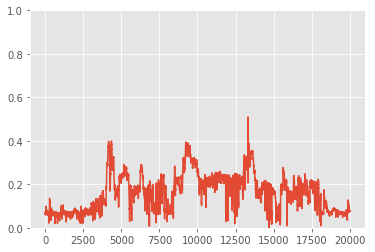

----------------- Ground Truth ---------------


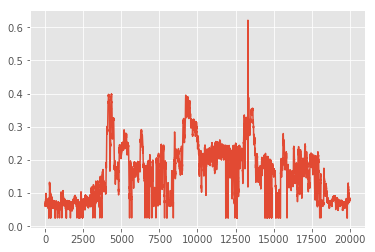

In [29]:
plt.gca().set_ylim(bottom=0)
plt.gca().set_ylim(top=1)

print('----------------- Predicted ---------------')
plt.plot(unseen_results[0:20000])
plt.show()

print('----------------- Ground Truth ---------------')
plt.plot(labels[0:20000])
plt.show()